# Practical Python Programming for Biologists
Author, Dr. Daniel Pass | www.CompassBioinformatics.com

---

#  Day 1 Project Challenge

We have been investigating the upstream sequence region of P2X1 and have data on Transcription Factor Binding Sites. I want you to write code to analyse the data collected and automatically output some interpretation in easy to read format (ready for a non-computer prof. to understand!).

You have been given the following data,
- A region of DNA that we're investigating
- A list of binding sites with their sequence and position of their first base
- A 2D list of binding sequence motifs and their frequency

There are infinite different ways to answer these questions and no true correct answer. Think about the approaches you might try first in normal languange, and then think how you would achive it with python. Take your time, this is a big collection of chalenges that should take 30+ minutes!

#### Objectives
1. Calculate the length of the region being studied and total AT% (AT regions are often associated with binding sites)
2. Divide the region into three equal sections and report if AT% is different between them
3. Print the DNA sequence of the given experimental binding motifs above the actual binding section from the long sequence region so that it looks like i.e.:

    ```
    TFBS1
    ACTGA
    ACAGA
    ```

    - Note: Use the position number to output the sequence of the region +/- 5bp: If the position is 100 and the motif is 5 bases long output bases: 95-[motif length=5]-110
    - Extension: Include the surrounding section too, aiming for a format like this:
    
          TFBS1
          -----XXXXX-----
          ACTGAXXXXXATCGA

Extensions:
- Make a bar chart showing frequency of in silico predictions - You can copy the barchart code from the introduction session to start
  - Should all in the list be represented? Maybe remove one?

---

Tips,
- Work on getting the outputs first. Make it look attractive second!
- Using regular `print()` statements can help understand what's happening
- Don't forget about the zip and unzip functions
- This may be a useful graph parameter, ```plt.xticks(rotation=90)```!
- Some commands are repeatative. We will solve this with loops in the next sessions but for now it is good to practice!


### Example of an upstream promotor region, with highlighted motifs (not your gene!)

![promotor.png](attachment:promotor.png)

Upstream DNA region of interest

In [1]:
>ref|NC_000008.11|,11670718-11670917 Homo sapiens chromosome 8, GRCh38.p14 Primary Assembly
AATTATTTACTTAGCTAGGAGTGTGAGCTTGAGGGCGGGTCTAATGAGTAGGTCAGAGTCAG
CCTGGCACAGCAAGAATGAAATAATTTTTTTTTTGAGATAAGGTCTTGCTCTGCCACCCAGG
CAATGGTGTGATCATAGGTCACTGTAACCTCAAACTCTTGGGCTCAAGTGATCCTCCTGCAT
AGTTGGTATTACTTAGCTAGGAGTGTGAGCTTGAGGGCGGGTCTAATGAGTAGGTCAGAGTC
CCTGGCACAGCAAGAATGAAATAATTTTTTTTGAGATAAGGTCTTGCTCTGCCACCCAGGAT
GGAGTGCAATGGTGTGATCATAGGTCACTGTAACCTCAAACTCTTGGGCTCAAGTGATCCTC
CTGCGTTGGTATTACTTAGCTAGGAGTGTGAGCTTGAGGGCGGGTTTTTTTTGAGATAAGGT
CTTGCTCTGCCACCCAGGATGGAGTGCAATGGTGTGATCATAGGTCACTGTAACCTCAAACT
CTTGGGCTCAAGTGATCCTCCTGC


SyntaxError: invalid syntax (ipython-input-44154651.py, line 1)

## Input Data

In [10]:
# Upstrem region of interest (as a string)
region_raw = "AATTATTTACTTAGCTAGGAGTGTGAGCTTGAGGGCGGGTCTAATGAGTAGGTCAGAGTCAGCCTGGCACAGCAAGAATGAAATAATTTTTTTTTTGAGATAAGGTCTTGCTCTGCCACCCAGGCAATGGTGTGATCATAGGTCACTGTAACCTCAAACTCTTGGGCTCAAGTGATCCTCCTGCATAGTTGGTATTACTTAGCTAGGAGTGTGAGCTTGAGGGCGGGTCTAATGAGTAGGTCAGAGTCCCTGGCACAGCAAGAATGAAATAATTTTTTTTGAGATAAGGTCTTGCTCTGCCACCCAGGATGGAGTGCAATGGTGTGATCATAGGTCACTGTAACCTCAAACTCTTGGGCTCAAGTGATCCTCCTGCGTTGGTATTACTTAGCTAGGAGTGTGAGCCGGAGGGCGGGTTTTTTTTGAGACAAGGTCTTGCCCCGCCACCCAGGAGGGAGTGCGCTGGTGTGATCATAGGTCACTGTAACCTCAAACTCTTGGGCTCGCGTGATCCCCCGGC"

region = region_raw.replace("\n","")

# The list of binding motifs confirmed by your CHIPSeq experiment and first base binding in region
TFBS_experimental = ["AGGTC", "TGATT", "GGTCT"]
confirmed_binding_sites = [139, 468, 225]

# Sequence motifs found in the region, and frequency
in_silico_sites = [('AATGA', 4), ('CATAG', 4), ('GGAGT', 5), ('GAGTG', 5), ('GGTCT', 5), ('TAGGT', 5), ('GGTCA', 5), ('GTGTG', 6), ('TGTGA', 6), ('TTGAG', 6), ('TCTTG', 6), ('GTGAT', 6), ('TGATC', 6), ('CTCAA', 6), ('AGGTC', 8), ('TTTTT', 14)]


In [22]:
from statsmodels.stats.proportion import proportions_ztest

#calculate length of region of interest
region_length = len(region)
print ("The region of interest is", region_length, "base pairs long.")
AT_content_raw = ((region.count("A") + region.count("T"))/region_length)*100
AT_content = round(AT_content_raw, 2)
print ("The AT content of the region of interest is", str(AT_content), "%")

#divide into 3

len_A = 173
len_B = 173

region_1 = list(region[0:len_A])
region_2 = list(region[len_A:(len_A + len_B)])
region_3 = list(region[(len_A+len_B):])

#sense check
len_region_1 = len(region_1)
len_region_2 = len(region_2)
len_region_3 = len(region_3)

print("The lengths of the 3 regions are:", len_region_1, len_region_2, len_region_3)

#check AT% of each

Reg_1_AT_content_raw = ((region_1.count("A") + region_1.count("T"))/len_region_1)*100
Reg_1_AT_content = round(Reg_1_AT_content_raw, 2)

Reg_2_AT_content_raw = ((region_2.count("A") + region_2.count("T"))/len_region_2)*100
Reg_2_AT_content = round(Reg_2_AT_content_raw, 2)

Reg_3_AT_content_raw = ((region_3.count("A") + region_3.count("T"))/len_region_3)*100
Reg_3_AT_content = round(Reg_3_AT_content_raw, 2)

print ("The AT content of the regions of interest are: \n Region 1", str(Reg_1_AT_content), "% \n Region 2", str(Reg_2_AT_content), "% \n Region 3",str(Reg_3_AT_content), "%" )

#are they different? reg 1 vs reg 2

AT_counts = [(region_1.count("A") + region_1.count("T")), (region_2.count("A") + region_2.count("T"))]

region_size = [len_region_1, len_region_2]

z_stat_1v2, p_value_1v2 = proportions_ztest(AT_counts, region_size)

z_1v2 = round(z_stat_1v2, 3)
p_1v2 = round(p_value_1v2, 3)

print("STATISTICS \n For region 1 vs region 2 \n z-statistic:", z_stat_1v2, "and p-value:", p_value_1v2)

if p_value_1v2 <=0.05 :
  print("The difference between regions 1 and 2 is significant.")

if p_value_1v2 >0.05 :
  print("The difference between regions 1 and 2 is NOT significant.")

#are they different? reg 1 vs reg 3

AT_counts = [(region_1.count("A") + region_1.count("T")), (region_3.count("A") + region_3.count("T"))]

region_size = [len_region_1, len_region_3]

z_stat_1v3, p_value_1v3 = proportions_ztest(AT_counts, region_size)

z_1v3 = round(z_stat_1v3, 3)
p_1v3 = round(p_value_1v3, 3)

print("For region 1 vs region 3 \n z-statistic:", z_stat_1v3, "and p-value:", p_value_1v3)

if p_value_1v3 <=0.05 :
  print("The difference between regions 1 and 3 is significant.")

if p_value_1v3 >0.05 :
  print("The difference between regions 1 and 3 is NOT significant.")

#are they different? reg 2 vs reg 3

AT_counts = [(region_2.count("A") + region_2.count("T")), (region_3.count("A") + region_3.count("T"))]

region_size = [len_region_2, len_region_3]

z_stat_2v3, p_value_2v3 = proportions_ztest(AT_counts, region_size)

z_2v3 = round(z_stat_2v3, 3)
p_2v3 = round(p_value_2v3, 3)

print("For region 2 vs region 3 \n z-statistic:", z_stat_2v3, "and p-value:", p_value_2v3)

if p_value_2v3 <=0.05 :
  print("The difference between regions 1 and 3 is significant.")

if p_value_2v3 >0.05 :
  print("The difference between regions 1 and 3 is NOT significant.")



The region of interest is 520 base pairs long.
The AT content of the region of interest is 51.15 %
The lengths of the 3 regions are: 173 173 174
The AT content of the regions of interest are: 
 Region 1 56.07 % 
 Region 2 53.76 % 
 Region 3 43.68 %
STATISTICS 
 For region 1 vs region 2 
 z-statistic: 0.43217430381721206 and p-value: 0.6656147338478539
The difference between regions 1 and 2 is NOT significant.
For region 1 vs region 3 
 z-statistic: 2.308225410870885 and p-value: 0.02098660253552787
The difference between regions 1 and 3 is significant.
For region 2 vs region 3 
 z-statistic: 1.8781457189821567 and p-value: 0.06036123341944491
The difference between regions 1 and 3 is NOT significant.


In [40]:
#extract the TFBS

len_TFBS_1 = len(TFBS_experimental[0])
len_TFBS_2 = len(TFBS_experimental[1])
len_TFBS_3 = len(TFBS_experimental[2])

sequence_TFBS_1 = region[confirmed_binding_sites[0]:(confirmed_binding_sites[0]+len_TFBS_1)]

sequence_TFBS_2 = region[confirmed_binding_sites[1]:(confirmed_binding_sites[1]+len_TFBS_2)]

sequence_TFBS_3 = region[confirmed_binding_sites[2]:(confirmed_binding_sites[2]+len_TFBS_3)]


print("The following TFBS were identified by ChIP-seq: \n \n TFBS1 \n", TFBS_experimental[0], "\n",sequence_TFBS_1, "\n \n TFBS2 \n", TFBS_experimental[1], "\n",sequence_TFBS_2,"\n \n TFBS3 \n", TFBS_experimental[2], "\n",sequence_TFBS_3)

#extract with neighbouring bases

len_TFBS_1 = len(TFBS_experimental[0])
len_TFBS_2 = len(TFBS_experimental[1])
len_TFBS_3 = len(TFBS_experimental[2])

sequence_TFBS_1_ext = region[(confirmed_binding_sites[0]-5):(confirmed_binding_sites[0]+len_TFBS_1+5)]

sequence_TFBS_2_ext = region[(confirmed_binding_sites[1]-5):(confirmed_binding_sites[1]+len_TFBS_1+5)]

sequence_TFBS_3_ext = region[(confirmed_binding_sites[2]-5):(confirmed_binding_sites[2]+len_TFBS_1+5)]


print(
    "\nThe following TFBS were identified by ChIP-seq (with genomic context):\n\n"
    "TFBS1\n-----" + TFBS_experimental[0] + "-----\n" + sequence_TFBS_1_ext + "\n\n"
    "TFBS2\n-----" + TFBS_experimental[1] + "-----\n" + sequence_TFBS_2_ext + "\n\n"
    "TFBS3\n-----" + TFBS_experimental[2] + "-----\n" + sequence_TFBS_3_ext
)

The following TFBS were identified by ChIP-seq: 
 
 TFBS1 
 AGGTC 
 AGGTC 
 
 TFBS2 
 TGATT 
 TGATC 
 
 TFBS3 
 GGTCT 
 GGTCT

The following TFBS were identified by ChIP-seq (with genomic context):

TFBS1
-----AGGTC-----
ATCATAGGTCACTGT

TFBS2
-----TGATT-----
TGGTGTGATCATAGG

TFBS3
-----GGTCT-----
GGGCGGGTCTAATGA


['AATGA', 'CATAG', 'GGAGT', 'GAGTG', 'GGTCT', 'TAGGT', 'GGTCA', 'GTGTG', 'TGTGA', 'TTGAG', 'TCTTG', 'GTGAT', 'TGATC', 'CTCAA', 'AGGTC', 'TTTTT']
[4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 8, 14]


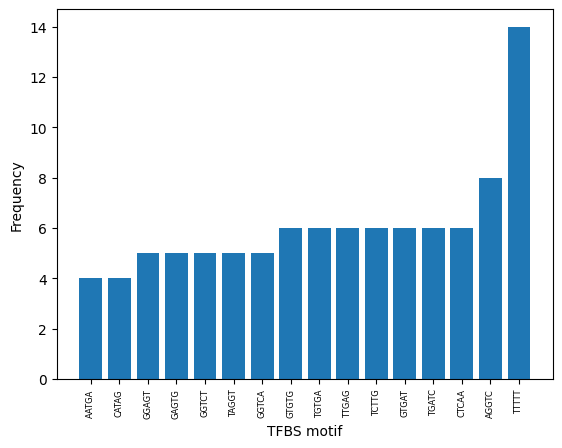

In [47]:
import matplotlib.pyplot as plt

# Sequence motifs found in the region, and frequency
in_silico_sites = [('AATGA', 4), ('CATAG', 4), ('GGAGT', 5), ('GAGTG', 5), ('GGTCT', 5), ('TAGGT', 5), ('GGTCA', 5), ('GTGTG', 6), ('TGTGA', 6), ('TTGAG', 6), ('TCTTG', 6), ('GTGAT', 6), ('TGATC', 6), ('CTCAA', 6), ('AGGTC', 8), ('TTTTT', 14)]

#separate tuple into two lists

motifs, frequency = zip(*in_silico_sites)

motifs = list(motifs)
frequency = list(frequency)

print(motifs)
print(frequency)

#bar plot

x = list(motifs)
y = list(frequency)

plt.bar(x, y)
plt.xlabel('TFBS motif')
plt.xticks(rotation=90, fontsize=6)
plt.ylabel('Frequency')
plt.show()

In [54]:
#locate in silico motifs within the region block?

motif_1 = motifs[0]
len_motif_1 = len(motif_1)

positions = []
start = 0
while True:
    pos = region.find(motif_1, start)
    if pos == -1:
        break
    positions.append(pos)
    start = pos + 1

print(positions)

#highlight them in a printed text????

from IPython.display import display, HTML

highlight_regions = [(pos, pos + len_motif_1) for pos in positions]

formatted_seq = ""
last_end = 0

for start, end in highlight_regions:

    formatted_seq += region[last_end:start]
    # Add the highlighted part (bold + underline)
    formatted_seq += f"<span style='color:red; font-weight:bold; text-decoration:underline;'>{region[start:end]}</span>"
    last_end = end

# Add the rest of the sequence
formatted_seq += region[last_end:]

# Show in notebook
display(HTML(f"<pre>{formatted_seq}</pre>"))


[42, 76, 230, 262]
